Idea:
* Um clean up this stuff!!
* Using the minimum spanning tree (with linear alignments distances for edge lenghts) as a guide to the merge (gradually merge things that are closer to each other to I THINK MAYBE potentially avoid some gaps?????) Idk if it works that way.

Current problems:
* None, besides from the general chaos!!

In [219]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [293]:

#ok, let's try with a class
class Tree:
    def __init__ (self,name):
        self.name=name
        self.next=[]
        self.components=[self.name]
    def __str__(self):
        return f"{self.name} {self.next}"
    def __repr__(self):
        return f"Tree(name='{self.name}', next={self.next})"
    @classmethod
    def add(cls, tree1, tree2):
        #alphabet=sorted(tuple[tree1,tree2]) #this part was an attempt to solve problem mentioned above but that did not work
        #tree1=alphabet[0]
        #tree2=alphabet[1]
        if not tree1.next:
            tree1.next.append(tree2)
        else:
            tree1.next.append(tree2)
        #tree1.name = tree1.name + "," + tree2.name
        tree1.components = tree1.components + tree2.components
        del tree2

In [294]:
matrixx=np.array([["",int(19),"a","b"],["",int(2),"b","c"],["",int(2),"d","c"],["",int(4),"d","b"],["",int(7),"d","a"],["",44,"b","e"],["",int(14),"f","g"],["",int(3),"g","a"]])
print(matrixx)

[['' '19' 'a' 'b']
 ['' '2' 'b' 'c']
 ['' '2' 'd' 'c']
 ['' '4' 'd' 'b']
 ['' '7' 'd' 'a']
 ['' '44' 'b' 'e']
 ['' '14' 'f' 'g']
 ['' '3' 'g' 'a']]


In [349]:
import numpy as np

matrixx = np.array([
    ["", int(19), "a", "b"],
    ["", int(2), "b", "c"],
    ["", int(2), "d", "c"],
    ["", int(4), "d", "b"],
    ["", int(7), "d", "a"],
    ["", int(44), "b", "e"],
    ["", int(14), "f", "g"],
    ["", int(3), "g", "a"],
    ["", int(5), "e", "f"],
    ["", int(8), "h", "g"],
    ["", int(1), "h", "e"],
    ["", int(10), "i", "j"],
    ["", int(6), "h", "i"],
    ["", int(3), "k", "j"],
    ["", int(9), "k", "l"],
    ["", int(4), "m", "l"],
    ["", int(2), "m", "n"],
    ["", int(5), "n", "o"],
    ["", int(11), "o", "p"],
    ["", int(7), "p", "m"]
])

print(matrixx)


[['' '19' 'a' 'b']
 ['' '2' 'b' 'c']
 ['' '2' 'd' 'c']
 ['' '4' 'd' 'b']
 ['' '7' 'd' 'a']
 ['' '44' 'b' 'e']
 ['' '14' 'f' 'g']
 ['' '3' 'g' 'a']
 ['' '5' 'e' 'f']
 ['' '8' 'h' 'g']
 ['' '1' 'h' 'e']
 ['' '10' 'i' 'j']
 ['' '6' 'h' 'i']
 ['' '3' 'k' 'j']
 ['' '9' 'k' 'l']
 ['' '4' 'm' 'l']
 ['' '2' 'm' 'n']
 ['' '5' 'n' 'o']
 ['' '11' 'o' 'p']
 ['' '7' 'p' 'm']]


In [350]:
#now to sorting the matrix
sorted_indices = np.lexsort((matrixx[:, 1].astype(int),))
E = matrixx[sorted_indices]
print(E)

[['' '1' 'h' 'e']
 ['' '2' 'b' 'c']
 ['' '2' 'd' 'c']
 ['' '2' 'm' 'n']
 ['' '3' 'g' 'a']
 ['' '3' 'k' 'j']
 ['' '4' 'd' 'b']
 ['' '4' 'm' 'l']
 ['' '5' 'e' 'f']
 ['' '5' 'n' 'o']
 ['' '6' 'h' 'i']
 ['' '7' 'd' 'a']
 ['' '7' 'p' 'm']
 ['' '8' 'h' 'g']
 ['' '9' 'k' 'l']
 ['' '10' 'i' 'j']
 ['' '11' 'o' 'p']
 ['' '14' 'f' 'g']
 ['' '19' 'a' 'b']
 ['' '44' 'b' 'e']]


In [351]:
min0,min1,min2=E[0][1],E[0][2],E[0][3] #extracting minmum path from the sorted matrix (E)
print(min0,min1,min2)

1 h e


In [352]:
names= np.unique(matrixx[:, 2:])
print(names)
name_dict= {letter:i for i, letter in enumerate(names)}
print(name_dict)

E[:,0]=''
trees=[]
for item in names:
    trees.append(Tree(item))
    x=0
for i,item in enumerate(E):
    while len(set(name_dict.values()))>1:
        print("\n \n new loop started")
        print("iteration"+str(x))
        print("dict, begin it"+str(x))
        print(name_dict)
        print("trees, begin it"+str(x))
        print(trees)
        min0,min1,min2=E[x][1],E[x][2],E[x][3] #get the next line in the matrix to get the letters/names of the trees
        tree1_id= name_dict[min1] #getting the positions of the letters in the current list of trees
        tree2_id= name_dict[min2]
        if tree2_id==tree1_id:
            print("i entered the break place with"+ str(tree1_id)+"and"+str(tree2_id)+str(min1)+str(min2))
            x+=1
            break
        else:
            E[x][0]="*"
            print("id tree1:")
            print(tree1_id)
            print(min1)
            print("id tree 2:")
            print(tree2_id)
            print(min2)
            tree1=trees[tree1_id] #get the first tree
            tree2=trees[tree2_id] #get he second tree
            Tree.add(tree1,tree2) #merge the two trees, meaning that our tree-list gets shorter. PROBLEM THOUGH: the last it. does not fully merge right now----
            trees.pop(tree2_id) #remove the tree that we just merged into another tree
            #name_dict = {key: value if value <= tree1_id else tree1_id for key, value in name_dict.items()}
            if tree1_id<tree2_id:
                orig_tree2_id=tree2_id
                name_dict[min2]=tree1_id # update the number associated with the letter/treee in the dictionary
                #name_dict = {key: (value - 1) if value > orig_tree2_id else value for key, value in name_dict.items()}
                for key in name_dict:
                    if name_dict[key] >= orig_tree2_id:
                        name_dict[key] -= 1
            else:
                orig_tree1_id=tree1_id
                name_dict[min1]=tree2_id # update the number associated with the letter/treee in the dictionary
                #name_dict = {key: (value - 1) if value > orig_tree1_id else value for key, value in name_dict.items()}
                for key in name_dict:
                    if name_dict[key] >= orig_tree1_id:
                        name_dict[key] -= 1

            print("trees and dict after it."+str(x)+":")
            print(trees)
            print(name_dict)
            print(E)
            x+=1
res_mat=E
            

['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p']
{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15}

 
 new loop started
iteration0
dict, begin it0
{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15}
trees, begin it0
[Tree(name='a', next=[]), Tree(name='b', next=[]), Tree(name='c', next=[]), Tree(name='d', next=[]), Tree(name='e', next=[]), Tree(name='f', next=[]), Tree(name='g', next=[]), Tree(name='h', next=[]), Tree(name='i', next=[]), Tree(name='j', next=[]), Tree(name='k', next=[]), Tree(name='l', next=[]), Tree(name='m', next=[]), Tree(name='n', next=[]), Tree(name='o', next=[]), Tree(name='p', next=[])]
id tree1:
7
h
id tree 2:
4
e
trees and dict after it.0:
[Tree(name='a', next=[]), Tree(name='b', next=[]), Tree(name='c', next=[]), Tree(name='d', next=[]), Tree(name='f', next=[]), Tree(name='g', n

In [353]:
#ok, now it could be really funny to see if I can draw the result!! #I start with my result from before.
print(res_mat)
edges=[]

for row in res_mat:
    weight = int(row[1])  # Extract the weight from the second column
    node1 = row[2]  # Extract the first node from the third column
    node2 = row[3]  # Extract the second node from the fourth column
    edges.append((node1, node2, {'weight': weight}))  # Add the tuple to the list

print(edges)

edges_in_min_path=[]

for row in res_mat:
    if row[0]=="*":  # Extract the weight from the second column
        node1 = row[2]  # Extract the first node from the third column
        node2 = row[3]  # Extract the second node from the fourth column
        edge=tuple(sorted([node1,node2]))
        edges_in_min_path.append(edge) # Add the tuple to the list

print(edges_in_min_path)
edges_in_min_path.sort()
print(edges_in_min_path)

[['*' '1' 'h' 'e']
 ['*' '2' 'b' 'c']
 ['*' '2' 'd' 'c']
 ['*' '2' 'm' 'n']
 ['*' '3' 'g' 'a']
 ['*' '3' 'k' 'j']
 ['' '4' 'd' 'b']
 ['*' '4' 'm' 'l']
 ['*' '5' 'e' 'f']
 ['*' '5' 'n' 'o']
 ['*' '6' 'h' 'i']
 ['*' '7' 'd' 'a']
 ['*' '7' 'p' 'm']
 ['*' '8' 'h' 'g']
 ['*' '9' 'k' 'l']
 ['*' '10' 'i' 'j']
 ['' '11' 'o' 'p']
 ['' '14' 'f' 'g']
 ['' '19' 'a' 'b']
 ['' '44' 'b' 'e']]
[('h', 'e', {'weight': 1}), ('b', 'c', {'weight': 2}), ('d', 'c', {'weight': 2}), ('m', 'n', {'weight': 2}), ('g', 'a', {'weight': 3}), ('k', 'j', {'weight': 3}), ('d', 'b', {'weight': 4}), ('m', 'l', {'weight': 4}), ('e', 'f', {'weight': 5}), ('n', 'o', {'weight': 5}), ('h', 'i', {'weight': 6}), ('d', 'a', {'weight': 7}), ('p', 'm', {'weight': 7}), ('h', 'g', {'weight': 8}), ('k', 'l', {'weight': 9}), ('i', 'j', {'weight': 10}), ('o', 'p', {'weight': 11}), ('f', 'g', {'weight': 14}), ('a', 'b', {'weight': 19}), ('b', 'e', {'weight': 44})]
[('e', 'h'), ('b', 'c'), ('c', 'd'), ('m', 'n'), ('a', 'g'), ('j', 'k'), 

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p']
[('a', 'g'), ('a', 'd'), ('a', 'b'), ('b', 'c'), ('b', 'd'), ('b', 'e'), ('c', 'd'), ('e', 'h'), ('e', 'f'), ('f', 'g'), ('g', 'h'), ('h', 'i'), ('i', 'j'), ('j', 'k'), ('k', 'l'), ('l', 'm'), ('m', 'n'), ('m', 'p'), ('n', 'o'), ('o', 'p')]
[('a', 'd'), ('a', 'g'), ('b', 'c'), ('c', 'd'), ('e', 'f'), ('e', 'h'), ('g', 'h'), ('h', 'i'), ('i', 'j'), ('j', 'k'), ('k', 'l'), ('l', 'm'), ('m', 'n'), ('m', 'p'), ('n', 'o')]


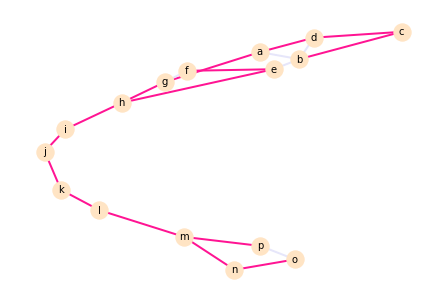

[('a', 'd'), ('a', 'g'), ('b', 'c'), ('c', 'd'), ('e', 'f'), ('e', 'h'), ('g', 'h'), ('h', 'i'), ('i', 'j'), ('j', 'k'), ('k', 'l'), ('l', 'm'), ('m', 'n'), ('m', 'p'), ('n', 'o')]


In [361]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_nodes_from(np.unique(E[:, 2:]))
G.add_edges_from(edges)
shortest_path=edges_in_min_path

print(G.nodes)
print(G.edges)
print(shortest_path)

pos = nx.spring_layout(G)
edge_colors = ['deeppink' if e in shortest_path else 'lavender' for e in G.edges()] #
nx.draw(G, pos, with_labels=True, node_color='bisque', edge_color=edge_colors, width=2, font_size=10)

# Show the plot
plt.show() 

print(edges_in_min_path)